# Analysis

Postprocess the results and creating the figure in the paper!

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import argparse
import json
import os
import gc
import warnings
from typing import List, Dict, Any
import time
import torch
from datasets import load_dataset, load_from_disk
from tqdm import tqdm
from vllm import LLM, SamplingParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import glob


sys.path.insert(0, "../../src/")
sys.path.insert(0, "../..")

from config import REPO_ROOT
from utils import postprocessing, scoring_function

# Set up matplotlib
%config InlineBackend.figure_format = 'svg'

INFO 09-10 16:13:21 [__init__.py:239] Automatically detected platform cuda.


In [2]:
# Process all house price results files
results_dir = REPO_ROOT / "analysis/prompt_sensitivity/results"
all_files = glob.glob(str(results_dir / "house_prices_*.json"))

print(f"Found {len(all_files)} files to process")

# Process each file
processed_results = []
for filepath in sorted(all_files):
    filename = os.path.basename(filepath)
    print(f"Processing {filename}...")
    
    try:
        # Run postprocessing first
        postprocessing_result = postprocessing(filepath, force=True, distance_metric="gower", save=True, explicit_dataset="")
        
        # Then run scoring
        scores = scoring_function(filepath, verbose=0, overwrite=False)
        
        # Extract key metrics
        result = {
            'filename': filename,
            'validity_percent': scores['validity_percent'],
            'mean_RCF_A': scores['mean_RCF_A'],
            'is_minimal': 'minimal' in filename,
            'perturbation_id': filename.split('_')[-1].replace('.json', '')
        }
        
        processed_results.append(result)
        print(f"  Validity: {result['validity_percent']:.2f}%, Mean RCF_A: {result['mean_RCF_A']:.4f}")
        
    except Exception as e:
        print(f"  Error processing {filename}: {str(e)}")
        continue

print(f"\nSuccessfully processed {len(processed_results)} files")
df_results = pd.DataFrame(processed_results)
print(df_results.head())

Found 40 files to process
Processing house_prices_0.json...
Extracted Dataset Name: house_prices_0.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.3914
Processing house_prices_1.json...
Extracted Dataset Name: house_prices_1.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4148
Processing house_prices_10.json...
Extracted Dataset Name: house_prices_10.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4114
Processing house_prices_11.json...
Extracted Dataset Name: house_prices_11.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.3787
Processing house_prices_12.json...
Extracted Dataset Name: house_prices_12.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4216
Processing house_prices_13.json...
Extracted Dataset Name: house_prices_13.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4071
Processing house_prices_14.json...
Extracted Dataset Name: house_prices_14.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4240
Processing house_prices_15.json...
Extracted Dataset Name: house_prices_15.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.3996
Processing house_prices_16.json...
Extracted Dataset Name: house_prices_16.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4119
Processing house_prices_17.json...
Extracted Dataset Name: house_prices_17.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4133
Processing house_prices_18.json...
Extracted Dataset Name: house_prices_18.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4160
Processing house_prices_19.json...
Extracted Dataset Name: house_prices_19.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4256
Processing house_prices_2.json...
Extracted Dataset Name: house_prices_2.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4137
Processing house_prices_3.json...
Extracted Dataset Name: house_prices_3.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4150
Processing house_prices_4.json...
Extracted Dataset Name: house_prices_4.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4072
Processing house_prices_5.json...
Extracted Dataset Name: house_prices_5.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4248
Processing house_prices_6.json...
Extracted Dataset Name: house_prices_6.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4693
Processing house_prices_7.json...
Extracted Dataset Name: house_prices_7.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4164
Processing house_prices_8.json...
Extracted Dataset Name: house_prices_8.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4166
Processing house_prices_9.json...
Extracted Dataset Name: house_prices_9.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 100.00%, Mean RCF_A: 0.4149
Processing house_prices_minimal_0.json...
Extracted Dataset Name: house_prices_minimal_0.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 9.88%, Mean RCF_A: 0.0007
Processing house_prices_minimal_1.json...
Extracted Dataset Name: house_prices_minimal_1.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 9.12%, Mean RCF_A: 0.0000
Processing house_prices_minimal_10.json...
Extracted Dataset Name: house_prices_minimal_10.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 9.62%, Mean RCF_A: 0.0029
Processing house_prices_minimal_11.json...
Extracted Dataset Name: house_prices_minimal_11.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 13.25%, Mean RCF_A: 0.0761
Processing house_prices_minimal_12.json...
Extracted Dataset Name: house_prices_minimal_12.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 9.75%, Mean RCF_A: 0.0037
Processing house_prices_minimal_13.json...
Extracted Dataset Name: house_prices_minimal_13.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 10.75%, Mean RCF_A: 0.0121
Processing house_prices_minimal_14.json...
Extracted Dataset Name: house_prices_minimal_14.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 10.81%, Mean RCF_A: 0.0083
Processing house_prices_minimal_15.json...
Extracted Dataset Name: house_prices_minimal_15.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 10.25%, Mean RCF_A: 0.0304
Processing house_prices_minimal_16.json...
Extracted Dataset Name: house_prices_minimal_16.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 10.31%, Mean RCF_A: 0.0030
Processing house_prices_minimal_17.json...
Extracted Dataset Name: house_prices_minimal_17.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 10.94%, Mean RCF_A: 0.0159
Processing house_prices_minimal_18.json...
Extracted Dataset Name: house_prices_minimal_18.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 10.38%, Mean RCF_A: 0.0064
Processing house_prices_minimal_19.json...
Extracted Dataset Name: house_prices_minimal_19.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 9.81%, Mean RCF_A: 0.0001
Processing house_prices_minimal_2.json...
Extracted Dataset Name: house_prices_minimal_2.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 11.88%, Mean RCF_A: 0.0116
Processing house_prices_minimal_3.json...
Extracted Dataset Name: house_prices_minimal_3.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 11.12%, Mean RCF_A: 0.0345
Processing house_prices_minimal_4.json...
Extracted Dataset Name: house_prices_minimal_4.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 10.88%, Mean RCF_A: 0.0047
Processing house_prices_minimal_5.json...
Extracted Dataset Name: house_prices_minimal_5.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 10.07%, Mean RCF_A: 0.0039
Processing house_prices_minimal_6.json...
Extracted Dataset Name: house_prices_minimal_6.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 13.88%, Mean RCF_A: 0.0560
Processing house_prices_minimal_7.json...
Extracted Dataset Name: house_prices_minimal_7.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 13.20%, Mean RCF_A: 0.0828
Processing house_prices_minimal_8.json...
Extracted Dataset Name: house_prices_minimal_8.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 21.31%, Mean RCF_A: 0.1567
Processing house_prices_minimal_9.json...
Extracted Dataset Name: house_prices_minimal_9.json


  0%|          | 0/1600 [00:00<?, ?it/s]

  Validity: 9.69%, Mean RCF_A: 0.0023

Successfully processed 40 files
               filename  validity_percent  mean_RCF_A  is_minimal  \
0   house_prices_0.json             100.0    0.391430       False   
1   house_prices_1.json             100.0    0.414843       False   
2  house_prices_10.json             100.0    0.411387       False   
3  house_prices_11.json             100.0    0.378670       False   
4  house_prices_12.json             100.0    0.421562       False   

  perturbation_id  
0               0  
1               1  
2              10  
3              11  
4              12  


Standard results: 20
Minimal results: 20


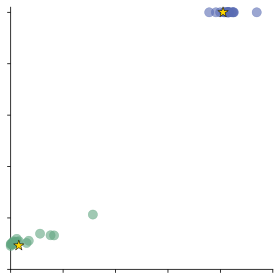


=== SUMMARY STATISTICS ===
Standard prompts - Validity: 100.00±0.00%
Standard prompts - Mean RCF_A: 0.4147±0.0171
Minimal prompts - Validity: 11.34±2.68%
Minimal prompts - Mean RCF_A: 0.0256±0.0398

Standard prompts validity range: 100.00% - 100.00%
Minimal prompts validity range: 9.12% - 21.31%


In [4]:
# Create scatter plot for all house price results
# Color and styling parameters (from scatter.ipynb)
colour_1 = "#596BB3"  # Standard prompts [Good]
colour_2 = "#61A580"  # Minimal prompts [Good]
_alpha = 0.6
_size = 85
_x_lim_min = 0.0
max = 0.5

# Separate standard and minimal results
standard_results = df_results[~df_results['is_minimal']].copy()
minimal_results = df_results[df_results['is_minimal']].copy()

print(f"Standard results: {len(standard_results)}")
print(f"Minimal results: {len(minimal_results)}")

# Create the scatter plot
fig, ax = plt.subplots(figsize=(4, 4), dpi=150,zorder=0)


ax.set_axisbelow(True)

for spine in ['top', 'right']:
    spine_obj = ax.spines[spine]
    spine_obj.set_visible(False)

ax.spines['left'].set_zorder(0)
ax.spines['bottom'].set_zorder(1)

# Plot standard results
ax.scatter(standard_results['mean_RCF_A'], standard_results['validity_percent'], 
           label='Standard', marker='o', s=_size, color=colour_1, 
           linewidth=0.5, alpha=_alpha, zorder=4, clip_on=False)

# Plot minimal results  
ax.scatter(minimal_results['mean_RCF_A'], minimal_results['validity_percent'],
           label='Minimal', marker='o', s=_size, color=colour_2,
           linewidth=0.5, alpha=_alpha, zorder=10, clip_on=False)

# Styling


# Star markers (highlighted points – not part of standard/minimal groups)
highlight_points = [
    (0.40506578942993654, 100),
    (0.015521277535102657, 9.25)
]

for (x, y) in highlight_points:
    ax.scatter([x], [y],
               marker='*', s=120, color='gold',
               edgecolor='black', linewidth=0.5,
               alpha=1.0, zorder=11, clip_on=False)



# Set axis limits
ax.set_xlim(_x_lim_min, max)
ax.set_ylim(0, 102)


ax.set_xticklabels([])   # remove x tick-label text
ax.set_yticklabels([])

plt.tight_layout()
plt.savefig(REPO_ROOT / "analysis/prompt_sensitivity/scatter_all_perturbations.png", 
            bbox_inches='tight', dpi=300)
plt.show()





# Print summary statistics
print("\n=== SUMMARY STATISTICS ===")
print(f"Standard prompts - Validity: {standard_results['validity_percent'].mean():.2f}±{standard_results['validity_percent'].std():.2f}%")
print(f"Standard prompts - Mean RCF_A: {standard_results['mean_RCF_A'].mean():.4f}±{standard_results['mean_RCF_A'].std():.4f}")
print(f"Minimal prompts - Validity: {minimal_results['validity_percent'].mean():.2f}±{minimal_results['validity_percent'].std():.2f}%")
print(f"Minimal prompts - Mean RCF_A: {minimal_results['mean_RCF_A'].mean():.4f}±{minimal_results['mean_RCF_A'].std():.4f}")

# Show distribution of results
print(f"\nStandard prompts validity range: {standard_results['validity_percent'].min():.2f}% - {standard_results['validity_percent'].max():.2f}%")
print(f"Minimal prompts validity range: {minimal_results['validity_percent'].min():.2f}% - {minimal_results['validity_percent'].max():.2f}%")